# Práctica de Análisis de Dataset: Listado de Airbnb
### Estimación del precio de una vivienda 

En este notebook se hará un análisis usando la base de datos de viviendas ./airbnb-listings-extract.csv.

Se realizará un proceso simple de análisis en una primera parte. A continuación, en la segunda parte se implementarán algoritmos de ML más avanzados y se terminará con una conclusión donde se comparen los resultados entre los distintos modelos.

Vamos a utilizar **DataFrames** de [Pandas](http://pandas.pydata.org/).

In [1]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

## 1. Carga de datos y división train/test

Lo primero que hacemos es cargar el dataset.
Eliminamos las columnas que no son necesarias para el análisis (ids, URLs, fechas, etc). En este caso se decide eliminar las columnas que tengan descripciones ya que no se ha llegado al módulo de Procesamiento de Lenguaje Natural y no se puede sacar partido al sentimiento de las descripciones.
Por último, se filtra para quedarnos únicamente con los registros de Madrid.

In [2]:
house_data = pd.read_csv("./data/airbnb-listings-extract.csv", delimiter = ';') # cargamos fichero
column_drop = ['ID','Listing Url','Scrape ID','Summary','Space','Description','Notes',
               'Neighborhood Overview','Transit','Interaction','Host About','Access',
               'House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url',
               'Host ID','Host URL','Host Name','Host Location','Host Thumbnail Url','Host Picture Url',
              'Last Scraped','Host Since','Calendar last Scraped','First Review','Last Review']
house_data = house_data.drop(column_drop, axis =1) # eliminamos columnas que no necesitamos
print(f'Dimensiones del dataset de training: {house_data.shape}')
house_data_madrid = house_data[house_data['City']=='Madrid']
print(f'Dimensiones del dataset de training: {house_data_madrid.shape}')
house_data_madrid.head(5)                                 # visualizamos 5 primeras filas

Dimensiones del dataset de training: (14780, 61)
Dimensiones del dataset de training: (13207, 61)


,Name,Experiences Offered,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
40,Habitación con baño .,none,within an hour,84.0,NaN,NaN,3.0,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28007, Spain",...,9.0,9.0,9.0,NaN,NaN,flexible,3.0,7.71,"40.4069528479,-3.6708944906","Host Has Profile Pic,Requires License,Instant ..."
41,Cómodo estudio en la calle Goya,none,within a few hours,100.0,NaN,Recoletos,1.0,1.0,"email,phone,reviews","Recoletos, Madrid, Comunidad de Madrid 28001, ...",...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,2.03,"40.4259039216,-3.6816474596","Host Has Profile Pic,Is Location Exact,Require..."
42,Studio & Terrace - Barrio Salamanca,none,within an hour,100.0,NaN,Recoletos,2.0,2.0,"email,phone,reviews,jumio,government_id","Recoletos, Madrid, Comunidad de Madrid 28001, ...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,3.28,"40.4283518893,-3.68715466311","Host Has Profile Pic,Host Identity Verified,Is..."
43,Cute single room -private bathroom,none,within an hour,100.0,NaN,Recoletos,8.0,8.0,"email,phone,reviews","Recoletos, Madrid, Comunidad de Madrid 28001, ...",...,10.0,10.0,9.0,NaN,NaN,strict,7.0,0.57,"40.4274544347,-3.68576302323","Host Has Profile Pic,Is Location Exact,Require..."
44,Deluxe Apartment in Barrio Salamanca (next to IE),none,within an hour,100.0,NaN,Recoletos,2.0,2.0,"email,phone,linkedin,reviews,jumio","Recoletos, Madrid, Comunidad de Madrid 28001, ...",...,NaN,NaN,NaN,NaN,NaN,moderate,2.0,NaN,"40.4286708577,-3.68542275712","Host Has Profile Pic,Host Identity Verified,Is..."


A partir de este punto, se divide el dataset en dos subconjuntos completamente independientes (2 archivos independientes): train y test.

In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(house_data_madrid, test_size=0.2, shuffle=True, random_state=42)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./data/house_data_madrid_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/house_data_madrid_test.csv', sep=';', decimal='.', index=False)

# Cargamos el dataset de train 

hd_madrid = pd.read_csv('./data/house_data_madrid_train.csv', sep=';', decimal='.')
hd_madrid.head(5).T

Dimensiones del dataset de training: (10565, 61)
Dimensiones del dataset de test: (2642, 61)


,0,1,2,3,4
Name,HABITACIÓN MADRID -MONCLOA,Cosy room in 100m2 flat with terrace,Near airport-Small 6m2 Bed room with full(double),BEDROOM LOOKING ONTO A NICE PATIO,GRANT II Plaza Mayor
Experiences Offered,none,none,none,none,none
Host Response Time,within an hour,within a few hours,within a few hours,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Gaztambide,Lista,NaN,Embajadores,La Latina
Host Listings Count,2.0,2.0,1.0,5.0,40.0
Host Total Listings Count,2.0,2.0,1.0,5.0,40.0
Host Verifications,"email,phone,reviews","email,phone,facebook,reviews,jumio,work_email","email,phone,reviews","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio"
Street,"Gaztambide, Madrid, Community of Madrid 28015,...","Lista, Madrid, Comunidad de Madrid 28006, Spain","Madrid, Comunidad de Madrid 28037, Spain","Embajadores, Madrid, Community of Madrid 28012...","Sol, Madrid, Community of Madrid 28013, Spain"


## 2. Análisis exploratorio

Analizamos la estructura básica del dataset con las funciones de Pandas `describe` y analizamos los nulos en las columnas del dataset.

In [4]:
hd_madrid.head().T

,0,1,2,3,4
Name,HABITACIÓN MADRID -MONCLOA,Cosy room in 100m2 flat with terrace,Near airport-Small 6m2 Bed room with full(double),BEDROOM LOOKING ONTO A NICE PATIO,GRANT II Plaza Mayor
Experiences Offered,none,none,none,none,none
Host Response Time,within an hour,within a few hours,within a few hours,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Acceptance Rate,NaN,NaN,NaN,NaN,NaN
Host Neighbourhood,Gaztambide,Lista,NaN,Embajadores,La Latina
Host Listings Count,2.0,2.0,1.0,5.0,40.0
Host Total Listings Count,2.0,2.0,1.0,5.0,40.0
Host Verifications,"email,phone,reviews","email,phone,facebook,reviews,jumio,work_email","email,phone,reviews","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio"
Street,"Gaztambide, Madrid, Community of Madrid 28015,...","Lista, Madrid, Comunidad de Madrid 28006, Spain","Madrid, Comunidad de Madrid 28037, Spain","Embajadores, Madrid, Community of Madrid 28012...","Sol, Madrid, Community of Madrid 28013, Spain"


In [5]:
columns_drop_text = ['Name']
hd_madrid = hd_madrid.drop(columns_drop_text, axis = 1)

In [6]:
#Eliminamos variables replicadas de información en ubicación
column_drop_loc = ['Street', 'State', 'Zipcode','Market', 'Smart Location', 'Country Code','Country', 'Latitude','Longitude','Geolocation']
hd_madrid = hd_madrid.drop(column_drop_loc, axis = 1)

In [7]:
#Eliminamos variables replicadas (que no aportan valor) en relación a los precios, calendario...
column_drop_price = ['Weekly Price','Monthly Price','Calendar Updated','Host Listings Count','Host Total Listings Count']
hd_madrid = hd_madrid.drop(column_drop_price, axis = 1)

In [8]:
hd_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9249.0,94.812520,15.331751,0.00,100.00,100.00,100.00,100.00
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accommodates,10565.0,3.189210,2.006728,1.00,2.00,2.00,4.00,16.00
Bathrooms,10523.0,1.254158,0.600759,0.00,1.00,1.00,1.00,8.00
Bedrooms,10550.0,1.292796,0.829620,0.00,1.00,1.00,2.00,10.00
Beds,10525.0,1.982993,1.514593,1.00,1.00,1.00,2.00,16.00
Square Feet,408.0,384.656863,567.349019,0.00,0.00,98.50,646.00,5167.00
Price,10557.0,66.036942,56.198644,9.00,31.00,52.00,80.00,875.00
Security Deposit,4508.0,183.769965,109.579790,70.00,100.00,150.00,200.00,950.00
Cleaning Fee,6234.0,29.635547,26.337892,4.00,15.00,25.00,35.00,500.00


In [9]:
hd_madrid.dtypes

Experiences Offered                object
Host Response Time                 object
Host Response Rate                float64
Host Acceptance Rate              float64
Host Neighbourhood                 object
Host Verifications                 object
Neighbourhood                      object
Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
City                               object
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Amenities                          object
Square Feet                       float64
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                      

In [10]:
#Vemos cuáles columnas tienen un valor nulo.
hd_madrid.isnull().any()

Experiences Offered               False
Host Response Time                 True
Host Response Rate                 True
Host Acceptance Rate               True
Host Neighbourhood                 True
Host Verifications                 True
Neighbourhood                      True
Neighbourhood Cleansed            False
Neighbourhood Group Cleansed      False
City                              False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                          True
Bedrooms                           True
Beds                               True
Bed Type                          False
Amenities                          True
Square Feet                        True
Price                              True
Security Deposit                   True
Cleaning Fee                       True
Guests Included                   False
Extra People                      False
Minimum Nights                    False


In [11]:
#Contabilizamos la cantidad de NaN por columna
print('Total: ',len(hd_madrid))
len(hd_madrid)-hd_madrid.count()

Total:  10565


Experiences Offered                   0
Host Response Time                 1316
Host Response Rate                 1316
Host Acceptance Rate              10565
Host Neighbourhood                 2603
Host Verifications                    7
Neighbourhood                      3561
Neighbourhood Cleansed                0
Neighbourhood Group Cleansed          0
City                                  0
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            42
Bedrooms                             15
Beds                                 40
Bed Type                              0
Amenities                            87
Square Feet                       10157
Price                                 8
Security Deposit                   6057
Cleaning Fee                       4331
Guests Included                       0
Extra People                          0
Minimum Nights                        0


In [12]:
#Eliminamos las columnas con una cantidad muy elevada de nulos
column_drop_null = ['Host Acceptance Rate','Square Feet','Has Availability','License','Jurisdiction Names']
hd_madrid = hd_madrid.drop(column_drop_null, axis =1)
print(f'Dimensiones del dataset: {hd_madrid.shape}')

Dimensiones del dataset: (10565, 40)


## NOTA:
Se añade análisis aplicando herramienta ydata_profiling sugerida por compañero en clase.

In [ ]:
#pip install ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(hd_madrid, title = "Informe datos Airbnb Madrid")
#Se añade al análisis exploratorio la herramienta comentada por Emilio durante las clases.

### Análisis de variables correlacionadas
Haciendo un análisis de la correlación entre las variables (bien usando el resultado del ydata_profiling o creando una matriz de correlaciones.
Se utiliza el resultado de la herramienta ydata_profiling para ver la correlación. Selección de características. Se detectan que las siguientes variables se pueden eliminar del dataset por su alta correlación (se decide mantener las variables de Review de categoría por poder aportar valor más adelante):

In [13]:
column_drop_corr = ['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 'Accommodates']

hd_madrid = hd_madrid.drop(column_drop_corr, axis = 1)
print(f'Dimensiones del dataset: {hd_madrid.shape}')

Dimensiones del dataset: (10565, 35)


### Análisis de outliers (usando variable Price para el filtro)
A continuación, se analizarán los valores outliers aplicando un filtro dentro de la variable del precio. Lo primero que se realizará es representar su histograma y, a partir del cual, se decidirá un valor a partir del cual, los valores que queden por fuera no superen el 1% de los registros en ninguno de los casos.

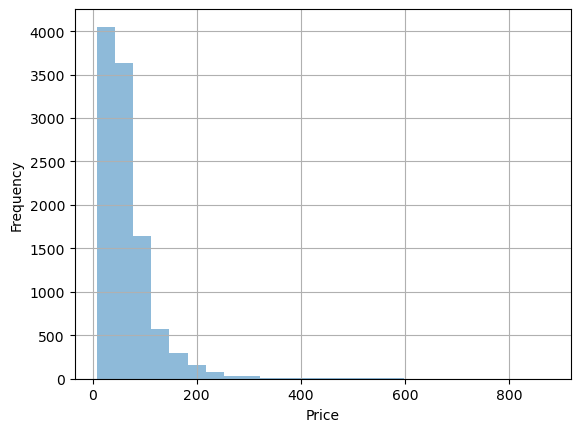

In [14]:
hd_madrid['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

plt.show()

In [15]:
print('Cantidad de registros: ', len(hd_madrid)) #cantidad de registros
print('Cantidad de registros en filtro: ', len(hd_madrid[hd_madrid['Price'] > 300])) #cantidad de registros con filtro aplicado
print('% de registros fuera: {:.2f}'.format(len(hd_madrid[hd_madrid['Price'] > 300])/len(hd_madrid)*100)) #porcentaje de registros que se quedan por fuera

Cantidad de registros:  10565
Cantidad de registros en filtro:  79
% de registros fuera: 0.75


In [16]:
hd_madrid['Price'].isna().sum() #valores nulos que tambien se eliminarán al aplicar filtro

8

In [17]:
hd_madrid = hd_madrid[hd_madrid['Price']<=300] #aplicamos filtro a dataframe
print(f'Dimensiones del dataset: {hd_madrid.shape}')

Dimensiones del dataset: (10478, 35)


### Análisis de valores '0' fuera de estudio
Hay valores en algunas columnas que no tienen un valor entero (>0) que quedan fuera del alcance del estudio. Bien porque sean trasteros ¿?, realmente aptos sin baños/camas, o porque faltan por rellenar su información como en los casos donde el precio = 0.

In [18]:
print(f'Cantidad registros sin camas: ',len(hd_madrid[hd_madrid['Beds'] == 0]))
print(f'Cantidad registros sin habitaciones: ',len(hd_madrid[hd_madrid['Bedrooms'] == 0]))
print(f'Cantidad registros sin baños: ',len(hd_madrid[hd_madrid['Bathrooms'] == 0]))
print(f'Cantidad registros sin precio: ',len(hd_madrid[hd_madrid['Price'] == 0]))

Cantidad registros sin camas:  0
Cantidad registros sin habitaciones:  754
Cantidad registros sin baños:  47
Cantidad registros sin precio:  0


Los registros sin habitaciones podrían incluirse los apartamentos tipo estudio / loft. Por lo que no se considerarán incompletos. El resto se limpia del dataset.

In [19]:
hd_madrid = hd_madrid[hd_madrid['Beds'] != 0]
hd_madrid = hd_madrid[hd_madrid['Bathrooms'] != 0]
hd_madrid = hd_madrid[hd_madrid['Price'] != 0]
print(f'Dimensiones del dataset: {hd_madrid.shape}')

Dimensiones del dataset: (10431, 35)


### Análisis de columnas no numéricas
Se estudia ahora las variables no numéricas (categóricas), sus valores, su cantidad de nulos y cómo completar en aquellos casos en los que amerite.

In [20]:
hd_madrid.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Experiences Offered,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none,none
Host Response Time,within an hour,within a few hours,within a few hours,within an hour,within an hour,NaN,NaN,within an hour,within an hour,NaN,within an hour,within a few hours,within an hour,within an hour,within an hour,within an hour,within an hour,within an hour,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0,NaN,NaN,100.0,100.0,NaN,91.0,100.0,100.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0
Host Neighbourhood,Gaztambide,Lista,NaN,Embajadores,La Latina,NaN,La Latina,Guindalera,Justicia,Embajadores,NaN,NaN,NaN,Aluche,Embajadores,NaN,NaN,Pacifico,Legazpi,Recoletos
Host Verifications,"email,phone,reviews","email,phone,facebook,reviews,jumio,work_email","email,phone,reviews","email,phone,reviews,manual_offline,jumio","email,phone,reviews,jumio","email,phone","email,phone,facebook","email,phone,facebook,reviews,jumio,government_id","email,phone,reviews,jumio","email,phone,facebook","email,phone,facebook,reviews,jumio,government_id","email,phone,facebook,reviews","email,phone,reviews","email,phone,reviews,jumio","email,phone,google,reviews,jumio,offline_gover...","email,phone,facebook,reviews,jumio,government_id","email,phone,reviews","email,phone,reviews","email,phone,facebook,reviews,jumio","email,phone,reviews"
Neighbourhood,Gaztambide,Lista,NaN,Embajadores,Sol,NaN,La Latina,Guindalera,Ibiza,Embajadores,NaN,NaN,NaN,Malasaña,Embajadores,NaN,NaN,Pacifico,Legazpi,Recoletos
Neighbourhood Cleansed,Gaztambide,Lista,Hellín,Embajadores,Sol,Valdezarza,Palacio,Guindalera,Ibiza,Embajadores,Lista,Acacias,Cuatro Caminos,Universidad,Embajadores,Embajadores,Palos de Moguer,Pacífico,Legazpi,Recoletos
Neighbourhood Group Cleansed,Chamberí,Salamanca,San Blas - Canillejas,Centro,Centro,Moncloa - Aravaca,Centro,Salamanca,Retiro,Centro,Salamanca,Arganzuela,Tetuán,Centro,Centro,Centro,Arganzuela,Retiro,Arganzuela,Salamanca
City,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment,Townhouse,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Apartment,Condominium,Other,Apartment,Apartment,Apartment,Apartment


Se observan que las columnas: Features, Amenities y Host Verifications son 'listas' separadas por ','. Se podrá analizar si tiene alguna implicación la cantidad de elementos que tienen con respecto al precio.

Por otro lado, se cuenta con varias columnas que hacen referencia a la ubicación: City, Neighbourhood Group Cleansed, Neighbourhood Cleansed, Neighbourhood. Se utilizará la columna Neighbourhood Group Cleansed como referencia, mientras que el resto se eliminará del estudio. City se elimina porque ya se ha filtrado para quedarnos solo con los registros de Madrid, por lo que no aporta valor.

Además, se detecta la columna Host Neighbourhood, que en algún caso podría aportar valor por proximidad al apartamento, pero que se decide eliminar del dataset en la altura actual.

In [21]:
def contar_elementos(texto): #función que permite contar elementos en un campo de texto
    return len(texto.split(','))

Para poder aplicar la función, primero es necesario rellenar los valores nulos (si no, da error):

In [22]:
hd_madrid['Features'].fillna("", inplace = True)
hd_madrid['Amenities'].fillna("", inplace = True)
hd_madrid['Host Verifications'].fillna("", inplace = True)

Ahora sí, podemos aplicar la función para sustituir la lista por su valor numérico:

In [23]:
hd_madrid['Features'] = hd_madrid['Features'].apply(contar_elementos)
hd_madrid['Amenities'] = hd_madrid['Amenities'].apply(contar_elementos)
hd_madrid['Host Verifications'] = hd_madrid['Host Verifications'].apply(contar_elementos)

Verificamos las modificaciones aplicadas al dataset:

In [24]:
hd_madrid.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Host Response Time,within an hour,within a few hours,within a few hours,within an hour,within an hour
Host Response Rate,100.0,100.0,100.0,100.0,100.0
Host Neighbourhood,Gaztambide,Lista,NaN,Embajadores,La Latina
Host Verifications,3,6,3,5,4
Neighbourhood,Gaztambide,Lista,NaN,Embajadores,Sol
Neighbourhood Cleansed,Gaztambide,Lista,Hellín,Embajadores,Sol
Neighbourhood Group Cleansed,Chamberí,Salamanca,San Blas - Canillejas,Centro,Centro
City,Madrid,Madrid,Madrid,Madrid,Madrid
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment


Siguiendo el estudio, antes de quedarnos con la columna Neighbourhood Group Cleansed, tenemos que saber si tiene valores nulos y cómo rellenarlos:

In [25]:
hd_madrid['Neighbourhood Group Cleansed'].isnull().sum()

0

En este caso no hay nulos, pero en caso que existan se rellenarán con esta columna: Neighbourhood Cleansed, como el siguiente paso dentro del ciclo de información

In [26]:
hd_madrid["Neighbourhood Group Cleansed"] = hd_madrid["Neighbourhood Group Cleansed"].fillna(hd_madrid["Neighbourhood Cleansed"])

A partir de ahora, eliminamos las columnas:

In [27]:
hd_madrid = hd_madrid.drop(['City','Neighbourhood', 'Neighbourhood Cleansed'], axis=1)

In [28]:
hd_madrid = hd_madrid.drop(['Host Neighbourhood'], axis=1)

In [29]:
print(f'Dimensiones del dataset: {hd_madrid.shape}')

Dimensiones del dataset: (10431, 31)


#### Codificación de variables categóricas

Se extrae la lista de variables no numéricas que quedan y se estudia si tienen valores nulos:

In [30]:
hd_madrid[list(hd_madrid.select_dtypes(include=['object']).columns)].count()

Experiences Offered             10431
Host Response Time               9156
Neighbourhood Group Cleansed    10431
Property Type                   10431
Room Type                       10431
Bed Type                        10431
Cancellation Policy             10431
dtype: int64

La variable que tiene valores missing es Host Response Time. Se rellenará con el valor más frecuente. En este caso, la moda:

In [31]:
hd_madrid['Host Response Time'] = hd_madrid['Host Response Time'].fillna(hd_madrid['Host Response Time'].mode()[0])
hd_madrid[list(hd_madrid.select_dtypes(include=['object']).columns)].count()

Experiences Offered             10431
Host Response Time              10431
Neighbourhood Group Cleansed    10431
Property Type                   10431
Room Type                       10431
Bed Type                        10431
Cancellation Policy             10431
dtype: int64

A pesar de no tener valores nulos, se observa que la columna 'Experiences Offered' cuenta con valores = none. Hay que ver cuántos de ellos lo son. Se prefiere estudiar los diferentes valores que tienen estas variables y su representación con respecto a todos los registros:

In [32]:
hd_madrid['Experiences Offered'].value_counts()

Experiences Offered
none    10431
Name: count, dtype: int64

In [33]:
hd_madrid['Neighbourhood Group Cleansed'].value_counts()

Neighbourhood Group Cleansed
Centro                   5355
Chamberí                  756
Salamanca                 689
Arganzuela                630
Tetuán                    354
Retiro                    336
Moncloa - Aravaca         316
Chamartín                 293
Latina                    288
Carabanchel               273
Ciudad Lineal             253
Puente de Vallecas        174
Hortaleza                 149
Fuencarral - El Pardo     119
Usera                     110
San Blas - Canillejas      87
Barajas                    67
Moratalaz                  63
Villaverde                 63
Villa de Vallecas          34
Vicálvaro                  22
Name: count, dtype: int64

In [34]:
hd_madrid['Property Type'].value_counts()

Property Type
Apartment             8604
House                  770
Condominium            288
Bed & Breakfast        249
Loft                   220
Other                  169
Dorm                    33
Guesthouse              32
Chalet                  16
Hostel                  14
Serviced apartment      11
Townhouse                6
Boutique hotel           4
Casa particular          3
Guest suite              3
Villa                    2
Earth House              2
Camper/RV                2
Tent                     1
Boat                     1
Bungalow                 1
Name: count, dtype: int64

In [35]:
hd_madrid['Room Type'].value_counts()

Room Type
Entire home/apt    6249
Private room       4031
Shared room         151
Name: count, dtype: int64

In [36]:
hd_madrid['Bed Type'].value_counts()

Bed Type
Real Bed         10197
Pull-out Sofa      190
Futon               29
Couch               10
Airbed               5
Name: count, dtype: int64

In [37]:
hd_madrid['Cancellation Policy'].value_counts()

Cancellation Policy
strict             3943
flexible           3332
moderate           3150
super_strict_60       4
super_strict_30       2
Name: count, dtype: int64

Se detecta que la columna 'Experiences Offered' tiene un valor único = none, por ese motivo se decide eliminar del dataset

In [38]:
hd_madrid = hd_madrid.drop(['Experiences Offered'], axis=1)

### Aplicar encoder sobre las variables categóricas
Se aplica un encoder sobre las variables categóricas que se han mencionado anteriormente. Para aplicar esto se sigue el código de ejemplo en el notebook 3.1.

In [43]:
# Target encoder hace algo así por debajo:

categorical = list(hd_madrid.select_dtypes(include=['object']).columns)

mean_map = {}
for c in categorical:
    mean = hd_madrid.groupby(c)['Price'].mean()
    hd_madrid[c] = hd_madrid[c].map(mean)    
    mean_map[c] = mean

# Si hubiera test, luego se haría:
#for c in categorical:
#    data_test[c] = data_test[c].map(mean_map[c])

hd_madrid.head()


,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,63.577672,100.0,3,68.701058,65.201883,32.914909,1.5,1.0,1.0,63.506325,...,10.0,10.0,10.0,10.0,10.0,9.0,71.773776,2.0,2.36,3
1,65.061516,100.0,6,77.770682,65.201883,32.914909,1.0,1.0,1.0,63.506325,...,10.0,10.0,10.0,10.0,10.0,10.0,61.528571,2.0,0.66,4
2,65.061516,100.0,3,38.931034,65.201883,32.914909,1.0,1.0,1.0,63.506325,...,10.0,10.0,10.0,10.0,9.0,9.0,61.528571,1.0,3.71,2
3,63.577672,100.0,5,70.507937,65.201883,83.742999,1.0,1.0,2.0,63.506325,...,9.0,9.0,10.0,10.0,9.0,9.0,71.773776,5.0,0.81,5
4,63.577672,100.0,4,70.507937,65.201883,83.742999,1.0,1.0,2.0,63.506325,...,9.0,10.0,8.0,9.0,9.0,9.0,71.773776,40.0,0.39,4


Revisamos el dataset por si queda algún parametro por rellenar:

In [44]:
hd_madrid.count()

Host Response Time                10431
Host Response Rate                 9156
Host Verifications                10431
Neighbourhood Group Cleansed      10431
Property Type                     10431
Room Type                         10431
Bathrooms                         10390
Bedrooms                          10416
Beds                              10392
Bed Type                          10431
Amenities                         10431
Price                             10431
Security Deposit                   4467
Cleaning Fee                       6171
Guests Included                   10431
Extra People                      10431
Minimum Nights                    10431
Maximum Nights                    10431
Availability 365                  10431
Number of Reviews                 10431
Review Scores Accuracy             8210
Review Scores Cleanliness          8215
Review Scores Checkin              8202
Review Scores Communication        8214
Review Scores Location             8199


Se rellenarán los valores pendientes a partir de las medias de cada una de las columnas:

In [45]:
hd_madrid = hd_madrid.fillna(hd_madrid.mean())
hd_madrid.isnull().any()

Host Response Time                False
Host Response Rate                False
Host Verifications                False
Neighbourhood Group Cleansed      False
Property Type                     False
Room Type                         False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Amenities                         False
Price                             False
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False
Extra People                      False
Minimum Nights                    False
Maximum Nights                    False
Availability 365                  False
Number of Reviews                 False
Review Scores Accuracy            False
Review Scores Cleanliness         False
Review Scores Checkin             False
Review Scores Communication       False
Review Scores Location            False


In [47]:
hd_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,10431.0,63.257022,1.901226,58.231156,63.577672,63.577672,63.577672,65.061516
Host Response Rate,10431.0,94.867955,14.187409,0.000000,94.867955,100.000000,100.000000,100.000000
Host Verifications,10431.0,4.128176,1.302760,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood Group Cleansed,10431.0,63.257022,12.552895,31.349206,51.669492,70.507937,70.507937,77.770682
Property Type,10431.0,63.257022,5.994295,17.000000,65.201883,65.201883,65.201883,152.500000
Room Type,10431.0,63.257022,25.058745,25.456954,32.914909,83.742999,83.742999,83.742999
Bathrooms,10431.0,1.247690,0.570556,0.500000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10431.0,1.276690,0.786059,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10431.0,1.957275,1.439513,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,10431.0,63.257022,1.731220,42.931034,63.506325,63.506325,63.506325,63.506325


----------------------------------------

## 3. Modelado, cross-validation y estudio de resultados en train y test

Ha llegado el momento de ejecutar los resultados. Para modelar, se cargan los datos de test y se aplican las mismas transformaciones que se han hecho para los datos de train. Siguiendo las buenas prácticas, se junta el pre-procesado en una única celda.

Antes de empezar, es necesario colocar la columna de interés (Price) en la primera posición:

In [67]:
hd_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10431.0,63.257022,44.049464,9.000000,30.000000,52.000000,80.000000,300.000000
Host Response Time,10431.0,63.257022,1.901226,58.231156,63.577672,63.577672,63.577672,65.061516
Host Response Rate,10431.0,94.867955,14.187409,0.000000,94.867955,100.000000,100.000000,100.000000
Host Verifications,10431.0,4.128176,1.302760,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood Group Cleansed,10431.0,63.257022,12.552895,31.349206,51.669492,70.507937,70.507937,77.770682
Property Type,10431.0,63.257022,5.994295,17.000000,65.201883,65.201883,65.201883,152.500000
Room Type,10431.0,63.257022,25.058745,25.456954,32.914909,83.742999,83.742999,83.742999
Bathrooms,10431.0,1.247690,0.570556,0.500000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10431.0,1.276690,0.786059,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10431.0,1.957275,1.439513,1.000000,1.000000,1.000000,2.000000,16.000000


Ahora replicamos todo el proceso que se ha seguido para el train para tenerlo en una celda:

In [21]:
# Importamos librerias necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

# Carga de datos
hd_madrid = pd.read_csv('./data/house_data_madrid_train.csv', sep=';', decimal='.')

# Eliminamos las columnas que no se utilizarán para el estudio / que no aportan valor / no se pueden procesar actualmente 
columns_drop_text = ['Name']
column_drop_loc = ['Street', 'State', 'Zipcode','Market', 'Smart Location', 'Country Code','Country', 'Latitude','Longitude','Geolocation']
column_drop_price = ['Weekly Price','Monthly Price','Calendar Updated','Host Listings Count','Host Total Listings Count']
column_drop_null = ['Host Acceptance Rate','Square Feet','Has Availability','License','Jurisdiction Names']
column_drop_corr = ['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 'Accommodates']

columns_to_drop = columns_drop_text + column_drop_loc + column_drop_price + column_drop_null + column_drop_corr

hd_madrid = hd_madrid.drop(columns_to_drop, axis=1)

# Convertimos las variables que son listas de elementos en valor numérico

def contar_elementos(texto): #función que permite contar elementos en un campo de texto
    return len(texto.split(','))

hd_madrid['Features'].fillna("", inplace = True)
hd_madrid['Amenities'].fillna("", inplace = True)
hd_madrid['Host Verifications'].fillna("", inplace = True)

hd_madrid['Features'] = hd_madrid['Features'].apply(contar_elementos)
hd_madrid['Amenities'] = hd_madrid['Amenities'].apply(contar_elementos)
hd_madrid['Host Verifications'] = hd_madrid['Host Verifications'].apply(contar_elementos)

# Eliminamos outliers en Price y otros
hd_madrid = hd_madrid[hd_madrid['Price']<=300] #aplicamos filtro a dataframe
hd_madrid = hd_madrid[hd_madrid['Beds'] != 0]
hd_madrid = hd_madrid[hd_madrid['Bathrooms'] != 0]
hd_madrid = hd_madrid[hd_madrid['Price'] != 0]

# Generamos características
hd_madrid["Neighbourhood Group Cleansed"] = hd_madrid["Neighbourhood Group Cleansed"].fillna(hd_madrid["Neighbourhood Cleansed"])
hd_madrid = hd_madrid.drop(['City','Neighbourhood', 'Neighbourhood Cleansed','Host Neighbourhood','Experiences Offered'], axis=1)

hd_madrid['Host Response Time'] = hd_madrid['Host Response Time'].fillna(hd_madrid['Host Response Time'].mode()[0])

# Categorizamos los datos de train
categorical = list(hd_madrid.select_dtypes(include=['object']).columns)

mean_map = {}
for c in categorical:
    mean = hd_madrid.groupby(c)['Price'].mean()
    hd_madrid[c] = hd_madrid[c].map(mean)    
    mean_map[c] = mean
    
# Rellenamos valores faltantes
hd_madrid = hd_madrid.fillna(hd_madrid.mean())

# Ponemos la columna Price en la 1º posición
cols = hd_madrid.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
hd_madrid = hd_madrid[cols]

Y ahora aplicamos fácilmente a test:

In [38]:
# Importamos librerias necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)

# Carga de datos
hd_madrid_test = pd.read_csv('./data/house_data_madrid_test.csv', sep=';', decimal='.')

# Eliminamos las columnas que no se utilizarán para el estudio / que no aportan valor / no se pueden procesar actualmente 
columns_drop_text = ['Name']
column_drop_loc = ['Street', 'State', 'Zipcode','Market', 'Smart Location', 'Country Code','Country', 'Latitude','Longitude','Geolocation']
column_drop_price = ['Weekly Price','Monthly Price','Calendar Updated','Host Listings Count','Host Total Listings Count']
column_drop_null = ['Host Acceptance Rate','Square Feet','Has Availability','License','Jurisdiction Names']
column_drop_corr = ['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 'Accommodates']

columns_to_drop = columns_drop_text + column_drop_loc + column_drop_price + column_drop_null + column_drop_corr

hd_madrid_test = hd_madrid_test.drop(columns_to_drop, axis=1)

# Convertimos las variables que son listas de elementos en valor numérico

def contar_elementos(texto): #función que permite contar elementos en un campo de texto
    return len(texto.split(','))

hd_madrid_test['Features'].fillna("", inplace = True)
hd_madrid_test['Amenities'].fillna("", inplace = True)
hd_madrid_test['Host Verifications'].fillna("", inplace = True)

hd_madrid_test['Features'] = hd_madrid_test['Features'].apply(contar_elementos)
hd_madrid_test['Amenities'] = hd_madrid_test['Amenities'].apply(contar_elementos)
hd_madrid_test['Host Verifications'] = hd_madrid_test['Host Verifications'].apply(contar_elementos)

# Eliminamos outliers en Price y otros
hd_madrid_test = hd_madrid_test[hd_madrid_test['Price']<=300] #aplicamos filtro a dataframe
hd_madrid_test = hd_madrid_test[hd_madrid_test['Beds'] != 0]
hd_madrid_test = hd_madrid_test[hd_madrid_test['Bathrooms'] != 0]
hd_madrid_test = hd_madrid_test[hd_madrid_test['Price'] != 0]

# Generamos características
hd_madrid_test["Neighbourhood Group Cleansed"] = hd_madrid_test["Neighbourhood Group Cleansed"].fillna(hd_madrid_test["Neighbourhood Cleansed"])
hd_madrid_test = hd_madrid_test.drop(['City','Neighbourhood', 'Neighbourhood Cleansed','Host Neighbourhood','Experiences Offered'], axis=1)

hd_madrid_test['Host Response Time'] = hd_madrid_test['Host Response Time'].fillna(hd_madrid['Host Response Time'].mode()[0])

# Categorizamos los datos con los de train
categorical = list(hd_madrid_test.select_dtypes(include=['object']).columns)

for c in categorical:
    hd_madrid_test[c] = hd_madrid_test[c].map(mean_map[c])    
    
# Rellenamos valores faltantes con las mean de train
hd_madrid_test = hd_madrid_test.fillna(hd_madrid.mean())

# Ponemos la columna Price en la 1º posición
cols = hd_madrid_test.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
hd_madrid_test = hd_madrid_test[cols]

Ahora podemos preparar los datos para sklearn:

In [39]:
from sklearn import preprocessing

# Dataset de train
data_train = hd_madrid.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = hd_madrid_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

Y si queremos, podemos normalizar con los datos de train:

In [40]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [41]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10431, 29)
Datos test:  (2602, 29)


Ahora vendría: cross validation, búsqueda de los parámetros óptimos, visualización de performance vs complejidad...

Fitting 7 folds for each of 20 candidates, totalling 140 fits
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ..........................alpha=0.31622776601683794; total time=   0.0s
[CV] END ...........................alpha=0.3569698846826065; total time=   0.0s
[CV] END ...........................alpha=0.3569698846826065; total time=   0.0s
[CV] END ...........................alpha=0.3569698846826065; total time=   0.0s
[CV] END ...........................alpha=0.3569698846826065; total time=   0.0s
[CV] END ...........................alpha=0.356

[CV] END ...........................alpha=2.8013567611988677; total time=   0.0s
[CV] END ...........................alpha=2.8013567611988677; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
[CV] END ...........................alpha=3.1622776601683795; total time=   0.0s
best mean cross-validation score: -735.025
best parameters: {'alpha': 0.31622776601683794}


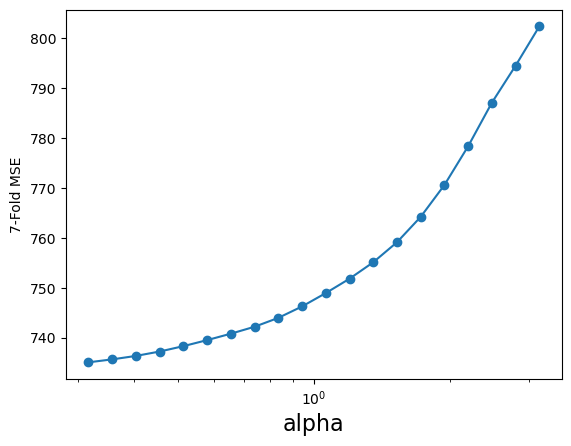

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-0.5,0.5,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 7, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('7-Fold MSE')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = hd_madrid.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 729
MSE Modelo Lasso (test) : 757
RMSE Modelo Lasso (train): 27
RMSE Modelo Lasso (test) : 27.5
Host Response Time 0.06321720982768358
Host Response Rate -0.9094395067371448
Host Verifications -0.3842088441710178
Neighbourhood Group Cleansed 6.040732406575563
Property Type -0.0
Room Type 15.951216750988106
Bathrooms 3.932779694531096
Bedrooms 10.245652446820937
Beds 2.718764659476672
Bed Type 0.22772193269967742
Amenities 1.249066217166873
Security Deposit 2.5934641462898016
Cleaning Fee 10.333204793103915
Guests Included 4.081824403474842
Extra People -1.3140523448967252
Minimum Nights -0.09223056400794603
Maximum Nights -0.0
Availability 365 2.3028791004135476
Number of Reviews -2.389457331127421
Review Scores Accuracy 1.1620845370653596
Review Scores Cleanliness 1.6658443230048503
Review Scores Checkin -0.09402158262946281
Review Scores Communication -0.7785234424673905
Review Scores Location 1.3062594038339643
Review Scores Value 0.0
Cancellation Policy -0

In [46]:
# Aplicando Árbol de decisión
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
#plt.plot(maxDepth,scores,'-o')
#plt.xlabel('max_depth',fontsize=16)
#plt.ylabel('10-Fold MSE')
#plt.show()

maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................

Fitting 4 folds for each of 14 candidates, totalling 56 fits


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.5s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.8s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   1.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.9s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   1.0s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.9s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   2.0s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   2.0s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.9s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   2.0s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   2.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   2.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   2.4s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   2.3s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   2.6s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   2.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   2.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   2.7s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   3.0s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   3.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   3.2s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   3.1s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   3.5s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   3.5s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   3.5s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   3.5s


C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best mean cross-validation score: 0.715
best parameters: {'max_depth': 14}


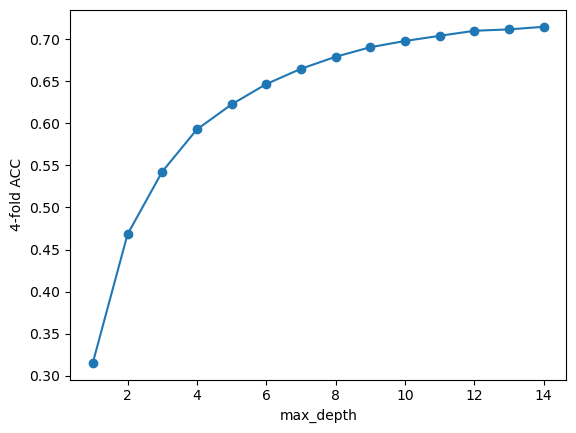

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train:  0.6728337946709806
Test:  0.6070906417025004


In [54]:
# Aplicando Random forest
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=42, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=4, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('4-fold ACC')
plt.show()

maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=6,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

### Conclusiones
Se observa que el método que da "mejores" resultados es Random Forest (usando max_depth=maxDepthOptimo). Sin embargo, se observa una clara diferencia entre los resultados de Train y Test en ese caso ¿Overfiting? 

Se itera después de ver el plot de la gráfica con una profundidad de 4 con el fin de ampliar la generalización de nuestro modelo. En este segundo caso, se disminuye el overfiting a cambio de perder una gran parte de las prestaciones. Incluso, quedando por debajo de las prestaciones del árbol de decisión.

Finalmente, se repite el cálculo para max_depth=6 -> En ese caso, aumenta la diferencia y los resultados obtenidos puede considerarse que son iguales a los del árbol de decisión.